<a href="https://colab.research.google.com/github/ced-sys/.py/blob/main/First_CUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nvidia System Management Interface
* It's a commnad-line utility that comes with the NVIDIA driver
* It queries the GPU driver and prints detailed information about the NVIDIA GPU available to

In [ ]:
!nvidia-smi

Sun Oct  5 11:32:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Output
`Driver Version: 550.54.15
CUDA Version: 12.4`
* The GPU Driver is installed in Colab is version 550.54.15
* The CUDA runtime version supported is 12.4-> that's the toolkit compiling against.

`0 Tesla T4`
* Colab assigned NVIDIA Tesla T4 GPU.
* Specs:
  * Turing architecture (same family as the RTX 2000 Series).
  * 16GB VRAM (15360MiB)
  * Optimized for inference and general CUDA work, not the absolute fastest.
* Solid GPU for CUDA experiments, ML training, and parallel programming.

`Temp: 50C Power: 9W/70W Memory Usage: 0 MiB/15360 MiB GPU Util: 0%`
* Temperature: 50C -> normal idle temp.
* Power Draw: Only 9W out 70W max ->Basically idle.
* Memory usage: 0/15360 MiB-> Nothing loaded yet.
* GPU Utilization: 0% -> not doing any computation yet.

** GPU is completely free and ready to launch CUDA kernels.**

`No running processes found`
* Means no program is currently using the GPU.


### !pip install
* pycuda:
  * Python wrapper for CUDA
  * Lets you write CUDA kernels and run them directly from Python.
  * Very useful, because you don't have to write full `.cu` files or use `nvcc` manually.
* pillow:
  * Imaging library in Python.
  * Let's you work with images (open, modify, save). Often used to visualize GPU-processed data.

* numpy:
  * Fundamental package for numerical arrays in Python.
  * Often pass `numpy` arrays to/from CUDA kernels.

* matplotlib:
  * Plotting library.
  * Using for visualizing results of CUDA computations (e.g., images, raphs, performance plots).

In [ ]:
!pip install pycuda pillow numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.6 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.2-cp312-cp312-linux_x86_64.whl size=659050 sha256=72de102f9e5573b5e329cbea51cd9c7d629088bee7a81b34ab5393065e9974e0
  Stored in directory: /root/.cache/pip/wheels/d5/36/f3/ac5f09d768cad3fa15d5a3449bdfe65c3de58e69d036c73228
Successfully built pycuda


### Import libraries
1. `import pycuda.driver as cuda`
* Brings in the low-level CUDA driver API (memory allocation, kernel launching, etc).
* Use of `cuda.mem_alloc`, `cuda.memcpy_htod`, `cuda.memcpy_dtoh`etc. to manage GPU memory.

2. `import pycuda.autoinit`
* Automatically initializes CUDA context on the first available GPU.
* Without this, you'd have to manually call `cuda.init()` and create a context.
* This just makes life easier.

3. `from pycuda.compiler import SourceModule`
* Allows you to compile CUDA C kernels written as ras strings inside Python.
* `mod.get_function("add")` would then return a callble GPU kernel.

4. `import numpy as np`
* Used to create and manipulate arrays (host-side, CPU memory).
* You'll often copy these arrays to/from the GPU.

5. `from PIL import Image`
* From the Pillow library -> lets you load, save and manipulate images.
* Handy if you want to pass image data into CUDA kernels (for processing, filtering, etc).

6. `import matplotlibpypot as plt`
* Visualization library.
* You'll use it to plot graphs or display processed images after running CUDA kernels.

7. `import time`
* Used for timing execution.
* Important in CUDA, since you'll want to measure how fast the gpU runs compared to the CPU.

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

### Original Image
1. `width, height=800, 600`
* Defines the size of the image (800 pixels widex 600 pixels tall).

2.`np.random.randint(0, 256,(height, width, 3),dtype=np.uint8)`
* Creates a random RGB image of shape `(600, 800, 3)`.
* Each pixel has 3 values-> Red, Green, Blue, each between 0-255 (`dtype=np.uint8` ensures valid image format).
* Initially, the image is just random noise.

3. Nested loop `for i in range height: for j in range(width):`
* Iterates over eac pixel `(i, j)` in the image.
* Then, it overwrites the random values with a gradient pattern:
  * Red channel(`img_array[i, j, 0]`):
  increases from 0->255 top to bottom (depends on row index `i`).
  * Green channel (`img_array[i, j, 1]`):increases from 0->255 left to right.
  (depends on column index `j`).
  * Blue channel (`img_array[i, j, 2]`):
  fixed at 128 everywhere.

* This produces a smoot red-green gradient wit h a constant bluish tint.

4. **Plotting with Matplotlib**
* `plt.imshow(img_array)` displays the generated image.
* `plt.axis('off')` hides te x-y axes for a clean view.
* `plt.show()` renders from the figure

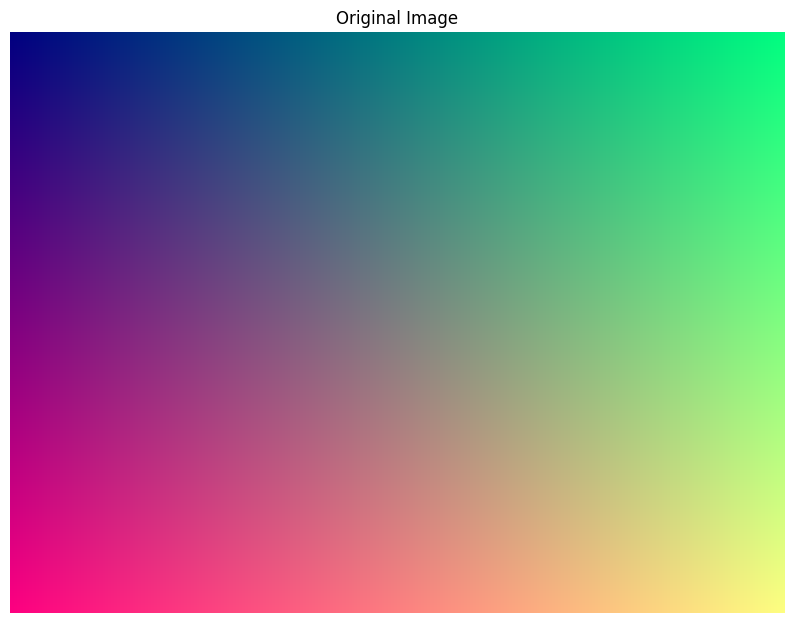

In [ ]:
#Create a simple test image
width, height=800, 600
img_array=np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

#Make it more interesting, add some patterns
for i in range(height):
  for j in range(width):
    img_array[i, j, 0]=(i*255)//height #Red Gradient
    img_array[i, j, 1]=(j*255)//width #Green Gradient
    img_array[i, j, 2]=128 #Constant blue

#Display it
plt.figure(figsize=(10, 8))
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

### Perform Box Blur filter

1. **CUDA Kernel definition**

`__global__ void blur_kernel(unsigned char *input, unsigned char *output, int width, in height, int channels) `

* `__global__`: means tis function runs on te GPU but is called from the CPU (host).
* It takes pointers to:
  * `input`: the image data (unsigned char array).
  * `output`: array where blurred pixels will be stored.
  * `width`, `height`, `channels`: image dimensions (e.g., 800x600x3).

2. **Determining Pixel Coordinates**

`int x=blockIdx.x * blockDim.x+threadIdx.x;`

`int y=blockIdx.x * blockDim.y+threadIdx.y;`
* Each CUDA thread corresponds to one pixel.
* `threadIdx` -> thread's index inside the block.

* `blockIdx`-> block's index inside te grid.
* The combination gives you the pixel coordinate `(x, y)` in the image.

**Each GPU thread will process exactly one pixel in the output image**

3. **Boundary check**
`if (x>=width || y>=height) return;`

* Ensures the thread doesn't go outside the image boundaries (which would cause memory access errors).

4. **Blur radius**
` int radius=5;`
* Defines the size of the 'window' used to average surrounding pixels.
* A radius of `5` means an 11x11 box (from `-5` to `+5`).

5 **Loop over channels**
 ` for(int c=0; c<channels; c++){`
 * Runs the blur separately for eac color channel (Red, Green, Blue).

6. **Compute Average of neighbouring pixels**
` for (int dy=-radius; dy<=radius; dy++){
    for (int dx=-radius; dx<=radius; dx++){
      int nx=x+dx;
      int ny=y+dy;
      if(nx>=0 && nx <width && ny >=0 && ny<height) {
        int idx=(ny*width +nx ) *channels+c;
        sum+= input[idx];
        count++;
      }
}
 `
 * For every pixel `(x, y)`:
    * The kernel checks all nearby pixels `(nx, ny)` in an 11x11 window.
    * Adds their vaues to `sum`.
    * Keeps count of how many valid pixels were added (to handle edges).

7. **Write the Blurred pixel**
`int out_idx=(y* width +x)* channels + c;`
`output[out_idx]=(unsigned char)(sum/count);`
* Takes the average intensity of the surrounding pixels and writes it to the output buffer.
* `sum/count` gives the average brightness for that channel.

8. **Compiling the Kernel**
`mod=SourceModule(cuda_kernel_code)`
`blur_kernel=mod.get_function("blur_kernel")`

* `SourceModule` compiles the C-style CUDA code string using NVIDIA's NVCC compiler in the background.
* `get_function("blur_kernel")` retrieves a callable GPU function you can launcg from Python.

**Summary**
* Kernel purpose: Apply a box blur to an RGB image.

* Threads: One per pixel

* Radius: 5(11x11)

* Output: Blurred image

* Compilation: Done by PyCUDA's `SourceModule`.

In [ ]:
cuda_kernel_code="""
__global__ void blur_kernel(unsigned char *input, unsigned char *output,
int width, int height, int channels)

{
  //Calculate which pixel this thread should process
  int x=blockIdx.x * blockDim.x + threadIdx.x;
  int y=blockIdx.y * blockDim.y + threadIdx.y;

  //Make sure we're inside the image
  if (x >= width || y>=height) return;

  //Blur radius
  int radius=5;

  //For each color channel (RGB)
  for (int c=0; c<channels; c++){
    float sum=0.0f;
    int count=0;

    //Average pixels in a square around this pixel
    for (int dy=-radius; dy<=radius; dy++){
      for (int dx=-radius; dx<=radius; dx++){
        int nx=x+dx;
        int ny=y+dy;

        //check bounds
        if (nx >=0 && nx <width && ny >=0 &&ny <height){
          int idx=(ny * width+nx)*channels +c;
          sum+=input[idx];
          count++;
        }
      }
    }

    //Write the average to output
    int out_idx=(y*width+x)* channels + c;
    output[out_idx]=(unsigned char)(sum/count);
  }
}
"""

#Compile kernel
mod=SourceModule(cuda_kernel_code)
blur_kernel=mod.get_function("blur_kernel")

### Execution and Visualization Cell
1. **Flattening the Image**
* The image (`img_array`) is a 3D NumPy array of shape `(height, width, 3)`.
* CUDA kernels operate on 1D contiguous memory, so `.flatten()` reshapes it to a 1D array.
* `output` is an empty buffer (same size) for storing the blurred image returnes from the GPU.

2. **Allocating Memory on the GPU**
* `cuda.mem_alloc()` reserves GPU memory for both input and output arrays.
* `.nbytes` gives the total number of bytes to allocate (`width x height x 3` bytes).
* These two lines correspong to `cudaMalloc()` in standard CUDA C++.

3. **Copying Data from CPU->GPU**
* `htod`= Host to Device
* Sends the flattened NumPy array from CPU memory (host) to GPU memory device.
* This is a necessary step because the kernel can't access CPU memory directly.

4. **Defining thread and block configuration**
CUDA threads are organised in:
  * Blocks (small groups of threads).
  * Grids (collection of blocks).
Here:
  * Each block contains `16 x 16=256` threads.
  * The grid is large enough to cover all `width x height` pixels.
  * The rounding formula ensures full coverage even if image dimensions don't divide evenly.

5. **Printing Thread Info (for sanity check)**
* Helps verify that every pixel has a corresponding GPU thread.
* Total threads= width x height (each pixel processed by one thread).

6. **Launching the CUDA kernel**
* The kernel is called like a regular Python function, but it runs on the GPU.
* You pass GPU pointers and image dimensions.
* The `block=` and `grid=` arguments tell CUDA how to distribute the work.
* `cuda.context.synchronize()` waits for the GPU to finish before continuing, otherwise, training would be inaccurate.
* The rime measured here (`gpu_time`) is pure GPU execution time.

7. **Copying data GPU->CPU**
* `dtoh`=Device to host.
* Copies the processed (blurred) image back from GPU memory to the CPU for visualization.

8. **Reshaping and displaying**
* Converts the 1D output buffer back to a 3D `(H, W, 3)` RGB array.
* Displays the blurred image with Matplotlib.
* The title shows the measured GPU runtime (in milliseconds).

**Under the Hood**
* Each CUDA thread runs the blur logic for one pixel.
* Thousands of threads execute simultaneously, each averaging surrounding pixel values.
* The GPU's massive parallelis makes it much faster than running nested loops on the CPU.

Grid size: (50, 38)
Block size: (16, 16, 1)
Total threads: 486400
GPU time: 0.34 ms


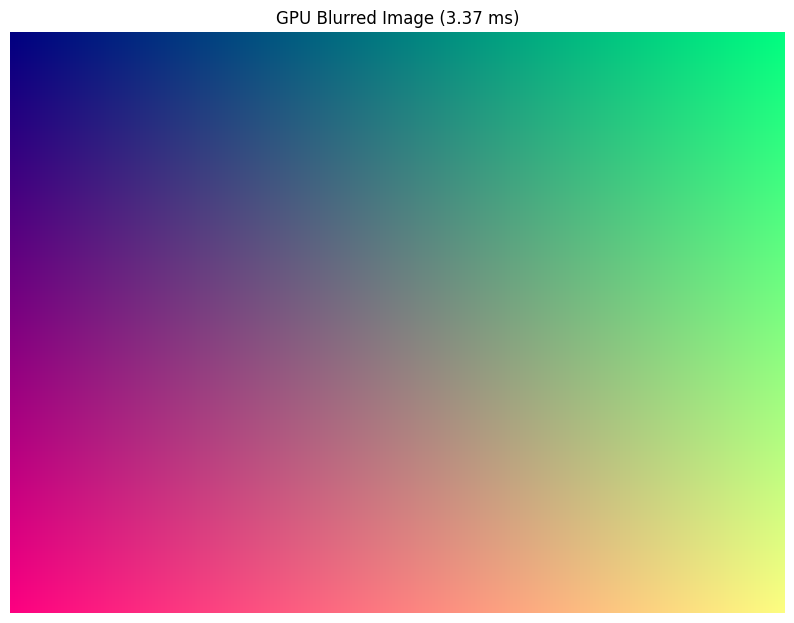

In [ ]:
#Prepare the Image data
img_flat=img_array.flatten().astype(np.uint8)
output=np.zeros_like(img_flat)

#Allocate GPU memory
img_gpu=cuda.mem_alloc(img_flat.nbytes)
output_gpu=cuda.mem_alloc(output.nbytes)

#Copy input data to GPU
cuda.memcpy_htod(img_gpu, img_flat)

#Define thread block and grid sizes
threads_per_block=(16, 16, 1) # 256 threads per block
blocks_per_grid=(
    (width+threads_per_block[0]-1)//threads_per_block[0],
    (height+threads_per_block[1]-1)// threads_per_block[1]
)

print(f"Grid size: {blocks_per_grid}")
print(f"Block size: {threads_per_block}")
print(f"Total threads: {blocks_per_grid[0]* blocks_per_grid[1]*threads_per_block[0]*threads_per_block[1]}")

#Time the GPU execution
start_time=time.time()
blur_kernel(
    img_gpu, output_gpu,
    np.int32(width), np.int32(height), np.int32(3),
    block=threads_per_block,
    grid=blocks_per_grid
)
cuda.Context.synchronize() #Wait for GPU to finish
gpu_time=time.time()-start_time

#Copy result back from GPU
cuda.memcpy_dtoh(output, output_gpu)

print(f"GPU time: {gpu_time*100:.2f} ms")

#Reshape and display
blurred_gpu=output.reshape(height, width, 3)

plt.figure(figsize=(10, 8))
plt.imshow(blurred_gpu)
plt.title(f"GPU Blurred Image ({gpu_time*1000:.2f} ms)")
plt.axis('off')
plt.show()

### CPU based blur
This part of the script defines and runs a CPU based blur to compare performance against the CUDA GPU kernel.

1. **Defines a blur function for the CPU**
(`blur_cpu`).
* Uses a naive nested loop over each pixel and color channel.
* Applies a blur radius of `5` (same as GPU kernel).
* Averages neighbouring pixel values.
* Its simple but computationally expensive(`O(n*r^2)`) complexity.

2. **Runs the CPU blur**
* Measures execution time with `time.time()`.
* prints timing and calculates speedup vs. the GPU version.

3. **Displays results**
* Three side-by-side images:
  * Original images
  * CPU blurred image with runtime.
  * GPU blurred image with runtim.

CPU time: 82379.13 ms
Speedup: 24468.741236x faster on GPU!


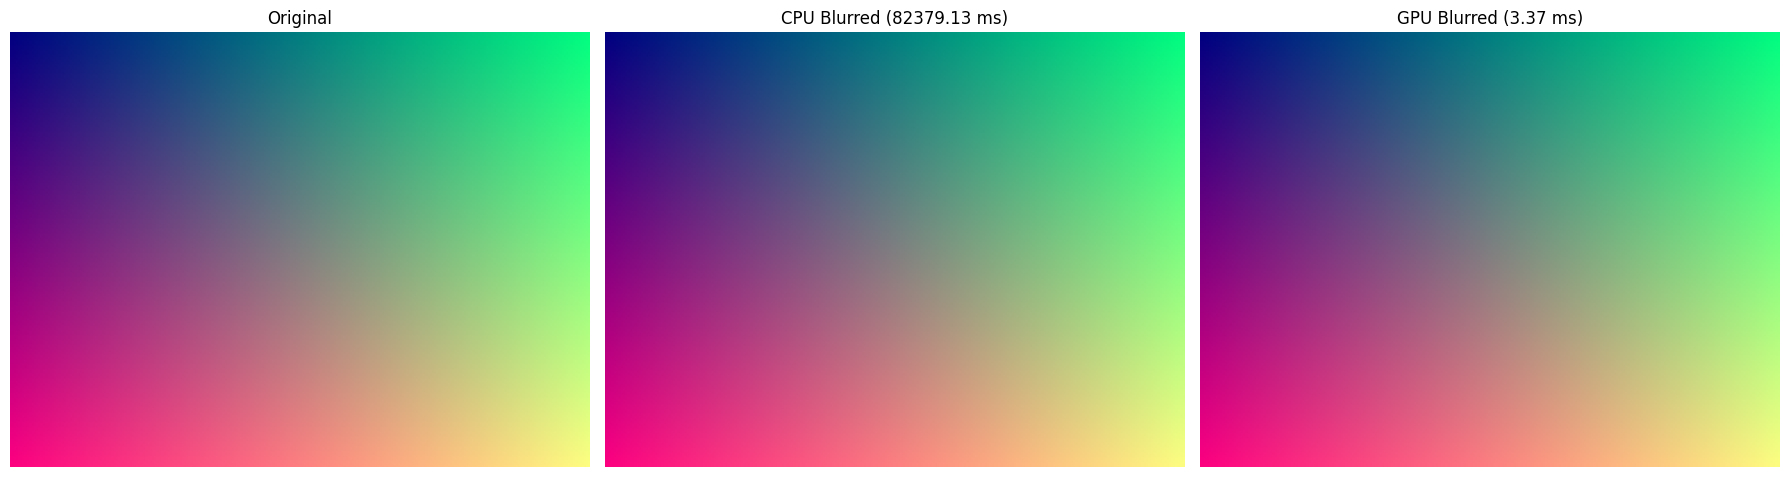

In [ ]:
def blur_cpu(img):
  """Simple CPU blur for comparison"""
  height, width, channels=img.shape
  output=np.zeros_like(img)
  radius=5

  for y in range(height):
    for x in range(width):
      for c in range(channels):
        sum_val=0.0
        count=0

        for dy in range(-radius, radius+1):
          for dx in range(-radius, radius+1):
            nx, ny=x+dx, y+dy
            if 0 <=nx<width and 0<= ny< height:
              sum_val+=img[ny, nx, c]
              count+=1

        output[y, x, c]=sum_val/ count

  return output.astype(np.uint8)

#Time CPU version
start_time=time.time()
blurred_cpu=blur_cpu(img_array)
cpu_time=time.time()-start_time

print(f"CPU time: {cpu_time*1000:.2f} ms")
print(f"Speedup: {cpu_time/gpu_time:2f}x faster on GPU!")

#Display comparison
fig, axes=plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(img_array)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(blurred_cpu)
axes[1].set_title(f"CPU Blurred ({cpu_time*1000:.2f} ms)")
axes[1].axis('off')

axes[2].imshow(blurred_gpu)
axes[2].set_title(f"GPU Blurred ({gpu_time*1000:.2f} ms)")
axes[2].axis('off')

plt.tight_layout()
plt.show()